In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('anonymized_transactions_full.csv')

In [3]:
data.columns

Index(['ORDER_ID', 'FF_CUSTOMER_ID', 'PLATFORM', 'LOCATION_NAME', 'CART',
       'TOTAL', 'EVENT_TIMESTAMP_LOCAL'],
      dtype='object')

In [4]:
# Elimina filas con cualquier valor nulo
data_clean = data.dropna()

# Verifica el tamaño antes y después
print(f"Filas antes: {len(data)}")
print(f"Filas después de eliminar nulos: {len(data_clean)}")


Filas antes: 8835279
Filas después de eliminar nulos: 3451601


In [5]:
data_sorted = data_clean.sort_values(
    ['FF_CUSTOMER_ID', 'EVENT_TIMESTAMP_LOCAL'],
    ascending=[True, False]
)

In [6]:
result = (
    data_sorted
    .groupby('FF_CUSTOMER_ID')
    .apply(lambda g: pd.Series({
        'order_count': g.shape[0],
        'orders': g.apply(lambda row: {
            'order_id': row['ORDER_ID'],
            'cart': row['CART'],
            'timestamp': row['EVENT_TIMESTAMP_LOCAL']
        }, axis=1).tolist()
    }))
    .reset_index()
)

/tmp/ipykernel_47701/2301355186.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [7]:
# Ver el primer registro completo
print(result.iloc[0])

FF_CUSTOMER_ID                 00003071-f5e3-4450-8b71-691699986c4f
order_count                                                       1
orders            [{'order_id': '5f988b294235402ca24f47daa4c9995...
Name: 0, dtype: object


In [8]:
# Ver la lista de pedidos del primer cliente
first_orders = result.iloc[0]['orders']
print(first_orders)


[{'order_id': '5f988b294235402ca24f47daa4c9995b', 'cart': "{'ITEM_G': 1}", 'timestamp': '2023-08-30 09:18:36.347 -0400'}]


In [9]:
result['order_count'].describe()

count    532946.000000
mean          6.476455
std         524.971466
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max      383107.000000
Name: order_count, dtype: float64

In [10]:
# Ver los clientes con más pedidos (top 10)
result.sort_values(by='order_count', ascending=False).head(10)

,FF_CUSTOMER_ID,order_count,orders
326249,9c80feef-5d9f-4c9a-8b99-4d4817cd77c8,383107,[{'order_id': '9190b19b-9662-4d06-9881-5e04600...
181991,57256a20-09d8-4644-a5d7-6ab21e9ccf7d,801,"[{'order_id': '4fvgxg', 'cart': '{'ITEM_B1': 1..."
281777,87395c19-1f60-4039-8da6-9b10ed72e3a7,587,"[{'order_id': 'q2dfka', 'cart': '{'ITEM_G1': 1..."
21424,0a1de29d-eb5d-4ed7-8736-b741019ce84d,586,"[{'order_id': 'wg9pac', 'cart': '{'ITEM_D': 1}..."
14142,06ae3c31-287e-45b9-b888-a7db1e85e12e,549,[{'order_id': '8e325c7d-5918-438c-a31d-4d89456...
465398,df717a3b-0032-4452-99b6-9b7b77591fea,515,"[{'order_id': 'uyk3qr', 'cart': '{'ITEM_L': 1}..."
355944,aac51b9e-a9f1-46f4-85ad-ab6eb36df9e2,482,"[{'order_id': 'jkdjd9', 'cart': '{'ITEM_E': 1}..."
473349,e339fd72-11d3-4e64-98f1-1d1fca316013,481,"[{'order_id': 'ezzp39', 'cart': '{'ITEM_C': 1}..."
38592,12577e82-3ce8-43c1-8c28-aaf11f87f893,473,"[{'order_id': '8p6d4m', 'cart': '{'ITEM_B3': 1..."
236989,71a8c212-5af8-4e52-bd4c-0618feae5f5f,470,"[{'order_id': 'bzpg6s', 'cart': '{'ITEM_D': 1,..."


In [11]:
# Eliminar la fila con el máximo order_count
max_value = result['order_count'].max()
result = result[result['order_count'] != max_value]

In [12]:
result['order_count'].describe()

count    532945.000000
mean          5.757619
std          14.413073
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         801.000000
Name: order_count, dtype: float64

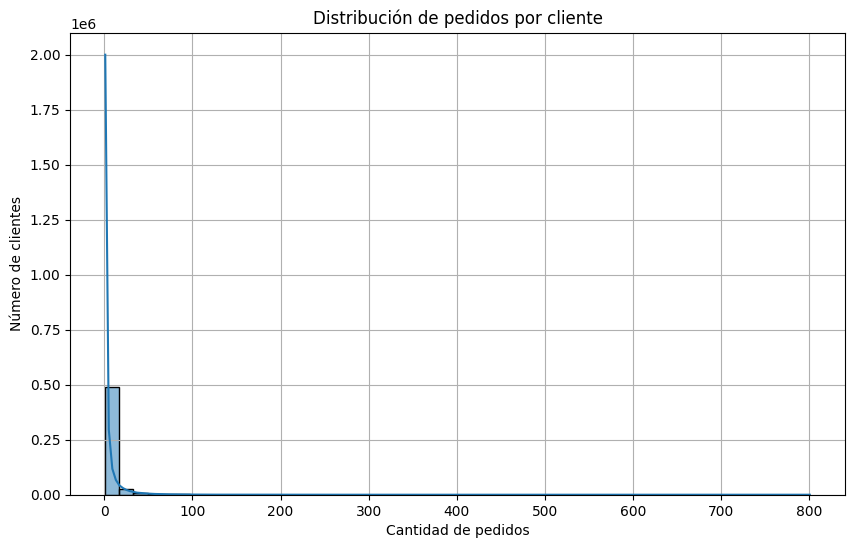

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica
plt.figure(figsize=(10, 6))
sns.histplot(result['order_count'], bins=50, kde=True)

plt.title('Distribución de pedidos por cliente')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()


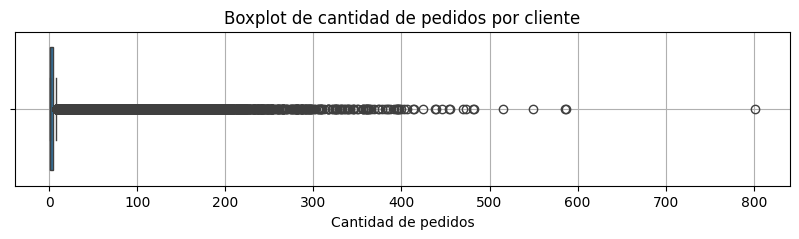

In [14]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=result['order_count'])

plt.title('Boxplot de cantidad de pedidos por cliente')
plt.xlabel('Cantidad de pedidos')
plt.grid(True)
plt.show()


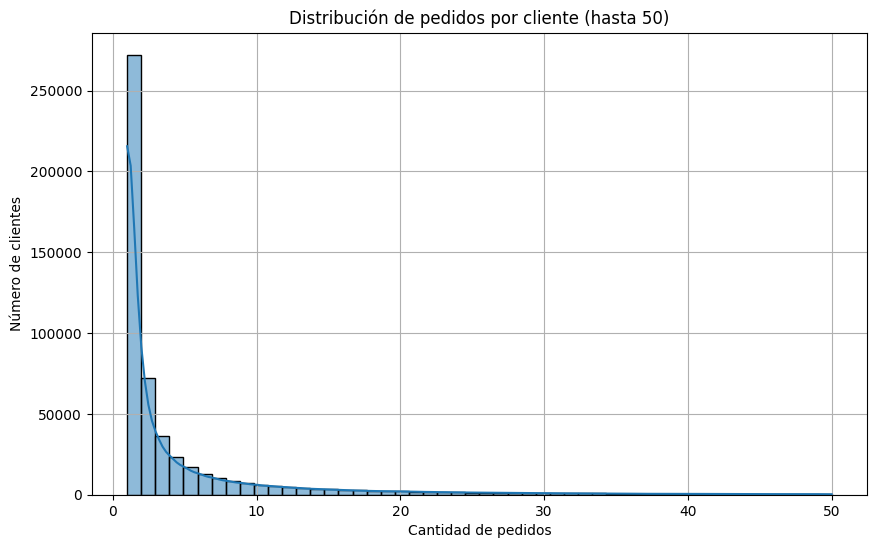

In [15]:
# Filtrar para clientes con <= 50 pedidos
subset = result[result['order_count'] <= 50]

plt.figure(figsize=(10, 6))
sns.histplot(subset['order_count'], bins=50, kde=True)

plt.title('Distribución de pedidos por cliente (hasta 50)')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()


In [16]:
# Porcentaje de clientes con al menos N pedidos
for N in [2, 3, 5, 10, 20]:
    count = (result['order_count'] >= N).sum()
    percent = count / len(result) * 100
    print(f"Clientes con al menos {N} pedidos: {count} ({percent:.2f}%)")


Clientes con al menos 2 pedidos: 260748 (48.93%)
Clientes con al menos 3 pedidos: 188590 (35.39%)
Clientes con al menos 5 pedidos: 129007 (24.21%)
Clientes con al menos 10 pedidos: 72824 (13.66%)
Clientes con al menos 20 pedidos: 35113 (6.59%)


In [17]:
# Filtrar los datos para que solo queden los clientes con 5 o más pedidos
result_filtrado_5_o_mas = result[result['order_count'] >= 5]

# Verificar cuántos registros quedan después del filtro
print(f"Filas después de filtrar: {len(result_filtrado_5_o_mas)}")


Filas después de filtrar: 129007


In [18]:
# Guardar el DataFrame filtrado en un archivo CSV
result_filtrado_5_o_mas.to_csv('clientes_5_o_mas_pedidos.csv', index=False)

print("Archivo CSV guardado como 'clientes_5_o_mas_pedidos.csv'")

Archivo CSV guardado como 'clientes_5_o_mas_pedidos.csv'


In [19]:
result_filtrado_5_o_mas.iloc[0]

FF_CUSTOMER_ID                 000097e7-b84f-4517-a8a7-59faa7d4c7ef
order_count                                                       5
orders            [{'order_id': 'csbkab', 'cart': '{'ITEM_B1': 1...
Name: 3, dtype: object

In [20]:
result_filtrado_5_o_mas.iloc[0]["orders"]

[{'order_id': 'csbkab',
  'cart': "{'ITEM_B1': 1}",
  'timestamp': '2025-03-23 11:52:05.467 -0500'},
 {'order_id': 'f7hkgt',
  'cart': "{'ITEM_B1': 1, 'ITEM_A3': 1}",
  'timestamp': '2024-11-02 06:12:01.637 -0500'},
 {'order_id': 'yfbwec',
  'cart': "{'ITEM_O2': 1}",
  'timestamp': '2024-08-22 12:31:11.750 -0500'},
 {'order_id': '897663098799468d8df8dc6c23754169',
  'cart': "{'ITEM_B1': 1}",
  'timestamp': '2024-03-25 15:17:36.238 -0500'},
 {'order_id': '50ac3346cdc94c2aa8ec7b8199dc9a2d',
  'cart': "{'ITEM_B1': 1, 'ITEM_A3': 1, 'ITEM_Z3': 1}",
  'timestamp': '2024-02-09 11:10:34.686 -0600'}]